In [60]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from typing import List
from typing import Tuple
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import ClusterCentroids
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [61]:
df = pd.read_csv('Credit_Card.csv')
label_df = pd.read_csv('Credit_card_label.csv')
merged_df = pd.merge(df, label_df, on='Ind_ID')

In [62]:
def clean_data(merged_df: pd.DataFrame, 
                          numerical_cols: List[str] = ['Annual_income', 'Birthday_count', 'Employed_days'], 
                          categorical_cols: List[str] = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 
                                                         'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation'], 
                          occupation_col: str = 'Type_Occupation') -> pd.DataFrame:
    for col in numerical_cols:
        df[col] = df[col].fillna(df[col].median())
    
    merged_df.dropna(subset=[occupation_col], inplace=True)
    
    merged_df['GENDER'] = merged_df['GENDER'].fillna(merged_df['GENDER'].mode()[0])
    
    encoded_df = pd.get_dummies(merged_df, columns=categorical_cols, drop_first=True)

    encoded_df = encoded_df.replace([np.inf, -np.inf], np.nan).fillna(0)

    encoded_df = encoded_df.astype(int)

    sc = StandardScaler()
    encoded_df[numerical_cols] = sc.fit_transform(encoded_df[numerical_cols])
    return encoded_df
encoded_df = clean_data(merged_df)
encoded_df

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
8,5010864,1,2.047160,-0.909858,0.842207,1,0,1,1,3,...,0,0,0,0,0,0,0,0,0,0
9,5010868,1,2.047160,-0.909858,0.842207,1,0,1,1,3,...,0,0,0,0,0,0,0,0,0,0
10,5010869,1,2.047160,-0.909858,0.842207,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
11,5018498,0,-0.878721,-1.110597,0.706227,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
12,5018501,0,-1.610191,-1.110597,0.706227,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,1,1.315690,0.867338,-0.357267,1,0,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1543,5028645,0,-1.610191,0.696052,0.210993,1,0,0,0,2,...,0,0,1,0,0,0,0,0,0,0
1544,5023655,0,0.218485,1.142482,0.619351,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1545,5115992,2,-0.147250,0.381638,0.087185,1,0,0,0,4,...,0,0,1,0,0,0,0,0,0,0


for number 2 i removed and replaced nll values, i also standerdized the data aswell as normalizing the data. their wasnt to much i could do to really change or improve it.

In [63]:
def apply_smote(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

In [64]:
def train_logistic_regression(encoded_df: pd.DataFrame) -> float:
    X = encoded_df.drop(columns=['label', 'Ind_ID'])
    y = encoded_df['label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_resampled, y_train_resampled = apply_smote(X_train, y_train)

    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train_resampled, y_train_resampled)

    y_pred = log_reg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return accuracy, report

accuracy, report = train_logistic_regression(encoded_df)
print(accuracy)
print(report)

0.7358490566037735
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       181
           1       0.14      0.16      0.15        31

    accuracy                           0.74       212
   macro avg       0.50      0.50      0.50       212
weighted avg       0.75      0.74      0.74       212



In [65]:
def find_optimal_k(encoded_df: pd.DataFrame, 
                   target_col: str, 
                   k_range: Tuple[int, int] = (1, 21), 
                   test_size: float = 0.2, 
                   random_state: int = 42) -> Tuple[int, float, pd.DataFrame, str, pd.Series, pd.Series]:

    X = encoded_df.drop(columns=[target_col])
    y = encoded_df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    X_train_resampled, y_train_resampled = apply_smote(X_train, y_train)
    
    best_k = 0
    best_score = 0
    
    for k in range(k_range[0], k_range[1]):
        knn = KNeighborsClassifier(n_neighbors=((2 * k) + 1))
        knn.fit(X_train_resampled, y_train_resampled)
        score = knn.score(X_test, y_test)
        if score > best_score:
            best_k = (2 * k) + 1
            best_score = score

    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train_resampled, y_train_resampled)

    y_pred = knn.predict(X_test)
    y_probs = knn.predict_proba(X_test)[:, 1]

    test_accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    return best_k, test_accuracy, conf_matrix, class_report, y_test, y_probs

best_k, test_accuracy, conf_matrix, class_report, y_test, y_probs = find_optimal_k(encoded_df, target_col='label')

print(f"Optimal k: {best_k}")
print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Optimal k: 7
Test Accuracy: 0.75
Confusion Matrix:
[[147  34]
 [ 19  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       181
           1       0.26      0.39      0.31        31

    accuracy                           0.75       212
   macro avg       0.57      0.60      0.58       212
weighted avg       0.79      0.75      0.77       212



i used oversampling with the imbalanced learning library i used the smote to use oversampling to help with the data to help balance the enn to removey 
weird samples to prevent overfitting. and smote helps oversample the minority
class ot help with the data. smote helped with the percison and the acuraccy
with the data.the knn and logistic regression were very accurate.

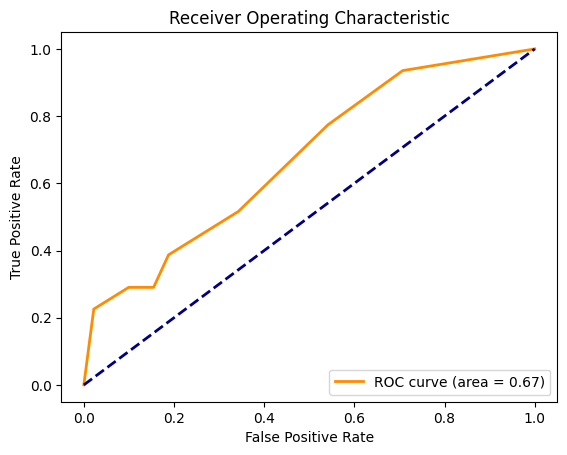

ROC AUC: 0.6729638210657637


In [68]:
def plot_roc_curve(y_test: np.ndarray, y_probs: np.ndarray) -> float:
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
    return roc_auc

roc_auc = plot_roc_curve(y_test, y_probs)
print(f"ROC AUC: {roc_auc}")

In [67]:
def train_evaluate_svm(encoded_df: pd.DataFrame, target_column: str = 'label') -> None:
    X = encoded_df.drop(['Ind_ID', target_column], axis=1)
    y = encoded_df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    classifier = SVC(kernel='linear', random_state=42)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_rep)
train_evaluate_svm(encoded_df)


Accuracy: 0.8742
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       275
           1       1.00      0.07      0.13        43

    accuracy                           0.87       318
   macro avg       0.94      0.53      0.53       318
weighted avg       0.89      0.87      0.82       318



the accurcy of the model is higher than before and the model did perform well
in the 

the overall accurcy improved, but the model performed beter in acuracy and percison.but the recall wasnt as good as it should have been. the model might have been balaced tworads the magorrity class even though it was balanced witht he minority class.

# 5
Outlier detection is the process of identifying data points in a dataset that significantly deviate from the expected pattern or distribution. Outliers are observations that are distant from other data points and may represent, rare events, measurement errors and variations of the data.
It is important to me because outlier's can casue problems when trying to manipulate a model. the outlier detection can help find problems in your data set that can be fixed and imporve the quality of the model.
you can use statiscical methods to find the outliers, machine learning techniques, and visualzation based apporaches like box plot histograms ans other things like that.